In [ ]:
! pip install -q condacolab
import condacolab
condacolab.install()
! conda update -n base -c conda-forge conda
! pip install tdqm
! mamba install openmc
#uncomment one of the below depending on which cross section library you want and update the materials section path accordingly
! wget -O - https://anl.box.com/shared/static/9igk353zpy8fn9ttvtrqgzvw1vtejoz6.xz | tar -C /content/ -xJ
#! wget -O - https://anl.box.com/shared/static/d359skd2w6wrm86om2997a1bxgigc8pu.xz | tar -C /content/ -xJ
#condacolab will force a crash, this is normal

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:19
🔁 Restarting kernel...
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-python-1.0.9        |  py310hd8f1fbe_9         319 KB  conda-forge
    c-ares-1.19.1              |     

In [ ]:
#%cd /content/endfb-vii.1-hdf5/neutron
%cd /content/mcnp_endfb71/
%ls
#remove the geometry xml file to prevent the "universe with id alrdy exists" warning
# !rm geometry.xml
# !rm summary.h5

/content/mcnp_endfb71
Ac225.h5              Cm241.h5            Hf179.h5     Pd105.h5     Sr87.h5
Ac226.h5              Cm242.h5            Hf180.h5     Pd106.h5     Sr88.h5
Ac227.h5              Cm243.h5            Hg196.h5     Pd107.h5     Sr89.h5
Ag107.h5              Cm244.h5            Hg198.h5     Pd108.h5     Sr90.h5
Ag109.h5              Cm245.h5            Hg199.h5     Pd110.h5     Ta180.h5
Ag110_m1.h5           Cm246.h5            Hg200.h5     photon/      Ta181.h5
Ag111.h5              Cm247.h5            Hg201.h5     Pm147.h5     Ta182.h5
Al27.h5               Cm248.h5            Hg202.h5     Pm148.h5     Tb159.h5
Am240.h5              Cm249.h5            Hg204.h5     Pm148_m1.h5  Tb160.h5
Am241.h5              Cm250.h5            Ho165.h5     Pm149.h5     Tc99.h5
Am242.h5              Co58.h5             Ho166_m1.h5  Pm151.h5     Te120.h5
Am242_m1.h5           Co58_m1.h5          I127.h5      Pr141.h5     Te122.h5
Am243.h5              Co59.h5             I129.h5      Pr14

In [ ]:
%matplotlib inline
import openmc

FuelSalt =openmc.Material(name='FuelSalt')
FuelSalt.add_nuclide('U234', 0.000528988, 'wo')
FuelSalt.add_nuclide('U235', 0.05072890, 'wo')
FuelSalt.add_nuclide('U236', 0.000242995, 'wo')
FuelSalt.add_nuclide('U238', 0.205354, 'wo')
FuelSalt.add_nuclide('Li6', 0.0000089998, 'wo')
FuelSalt.add_nuclide('Li7', 0.101955, 'wo')
FuelSalt.add_nuclide('F19',0.586948, 'wo')
FuelSalt.add_nuclide('Be9', 0.0542328, 'wo')
FuelSalt.set_density('g/cc', 2.645)
FuelSalt.volume = 140790
FuelSalt.temperature = 873

graphite = openmc.Material(name='graphite')
graphite.add_element('B', 0.000001, 'wo')
graphite.add_nuclide('C0', 0.999999, 'wo')
graphite.set_density('g/cc', 1.8)
graphite.add_s_alpha_beta('c_Graphite')
graphite.temperature = 873

air=openmc.Material(name='air')
air.add_nuclide('C0', 0.000124, 'wo')
air.add_nuclide('N14' ,0.755268, 'wo')
air.add_nuclide('O16', 0.231781, 'wo')
air.add_element('Ar', 0.012827, 'wo')
air.set_density('g/cc', 1.29E-3)
air.temperature = 300

m1conc=openmc.Material(name='m1')
m1conc.add_nuclide('H1', 0.008, 'wo')
m1conc.add_element('B', 0.009, 'wo')
m1conc.add_nuclide('O16', 0.107, 'wo')
m1conc.add_element('Mg', 0.043, 'wo')
m1conc.add_element('Cl', 0.021, 'wo')
m1conc.add_nuclide('Mn55', 0.03, 'wo')
m1conc.add_element('Ca', 0.011, 'wo')
m1conc.add_element('Fe', 0.798, 'wo')
m1conc.set_density('g/cc', 4.5)
m1conc.temperature = 300

poly=openmc.Material(name='poly')
poly.add_nuclide('H1', 0.143716, 'wo')
poly.add_nuclide('C0', 0.856284, 'wo')
poly.set_density('g/cc', 0.94)
poly.temperature = 300

b4c=openmc.Material(name='b4c')
b4c.add_element('B', 0.782610, 'wo')
b4c.add_nuclide('C0', 0.217390, 'wo')
b4c.set_density('g/cc', 1.89)
b4c.temperature = 300

OakRidgeConc=openmc.Material(name='OakRidgeConc')
OakRidgeConc.add_nuclide('H1', 0.006187, 'wo')
OakRidgeConc.add_nuclide('C0', 0.175193, 'wo')
OakRidgeConc.add_nuclide('O16', 0.410184, 'wo')
OakRidgeConc.add_nuclide('Na23', 0.00271, 'wo')
OakRidgeConc.add_element('Mg', 0.032649, 'wo')
OakRidgeConc.add_nuclide('Al27', 0.0183, 'wo')
OakRidgeConc.add_element('Si', 0.034479, 'wo')
OakRidgeConc.add_element('K', 0.001138, 'wo')
OakRidgeConc.add_element('Ca', 0.321287, 'wo')
OakRidgeConc.add_element('Fe', 0.7784, 'wo')
OakRidgeConc.set_density('g/cc', 2.3)
OakRidgeConc.temperature = 300

SS316H=openmc.Material(name='SS316H')
SS316H.add_nuclide('C0',0.001, 'wo')
SS316H.add_element('Si', 0.00507, 'wo')
SS316H.add_nuclide('P31', 0.0023, 'wo')
SS316H.add_element('S', 0.00015, 'wo')
SS316H.add_element('Cr', 0.17, 'wo')
SS316H.add_nuclide('Mn55', 0.01014, 'wo')
SS316H.add_element('Fe', 0.66841, 'wo')
SS316H.add_element('Ni', 0.12, 'wo')
SS316H.add_element('Mo', 0.025, 'wo')
SS316H.set_density('g/cc', 8)
SS316H.temperature = 600

#was gold schottky, changed to Nickel
Au = openmc.Material(name='Ni')
Au.add_element('Ni', 1.0)
Au.set_density('g/cc', 8.9)
Au.temperature = 300

SiC = openmc.Material(name='SiC')
SiC.add_element('Si', 0.5)
SiC.add_nuclide('C0', 0.5)
SiC.set_density('g/cc', 3.22)
SiC.temperature = 300

Li = openmc.Material(name='Li')
Li.add_nuclide('Li6', .95, 'wo')
Li.add_nuclide('Li7', .05, 'wo')
Li.set_density('g/cc', 2.64)
Li.temperature = 300

F = openmc.Material(name='F')
F.add_element('F', 1)
F.set_density('g/cc', 2.64)
F.temperature = 300

LiF=openmc.Material.mix_materials([Li, F], [.5, .5], 'ao')

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([FuelSalt, graphite, air, m1conc, poly, b4c, OakRidgeConc, SS316H, Au, SiC, LiF])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"#"/content/mcnp_endfb71/cross_sections.xml"
materials_file.export_to_xml()

# Detector = openmc.XCylinder(y0=0.0, z0=0.0, r=0.124122)

#define regions
fuel_channel=openmc.ZCylinder(r=1.508)
fuel_cell = openmc.Cell(fill=FuelSalt, region=-fuel_channel)
graphite_cell = openmc.Cell(fill=graphite, region=+fuel_channel)
fuel_universe = openmc.Universe(cells=(fuel_cell, graphite_cell))

graphite_cell2=openmc.Cell(fill=graphite)
outer_universe = openmc.Universe(cells=(graphite_cell2,))

lattice = openmc.HexLattice()

lattice.center = (0,0)
lattice.pitch = (10.16,)
lattice.outer = outer_universe

ring_6 = [fuel_universe]*5+[outer_universe]+[fuel_universe]*4+[outer_universe]+[fuel_universe]*9+[outer_universe]+[fuel_universe]*4+[outer_universe]+[fuel_universe]*4
ring_5 = [fuel_universe]*24
ring_4 = [fuel_universe]*18
ring_3 = [fuel_universe]*12
ring_2 = [fuel_universe]*6
ring_1 = [fuel_universe]*1

core_top = openmc.ZPlane(z0=+151.68)
core_bot = openmc.ZPlane(z0=0)

lattice.universes = [ring_6, ring_5, ring_4, ring_3, ring_2, ring_1]
lattice_boundary = openmc.ZCylinder(r=64)
reactor_cell = openmc.Cell(fill=lattice, region=-lattice_boundary & -core_top & +core_bot)

annulus_boundary = openmc.ZCylinder(r=65)

annulus_cell = openmc.Cell(fill=FuelSalt, region=+lattice_boundary & -annulus_boundary & -core_top & +core_bot)

vessel_boundary = openmc.ZCylinder(r=67)
vessel_cell = openmc.Cell(fill=SS316H, region=+annulus_boundary & -vessel_boundary & -core_top & +core_bot)

top_fuel_hemisphere = openmc.Sphere(z0=38.475, r=130.54)
top_vessel_hemisphere = openmc.Sphere(z0=38.475, r=131.5425)
top_fuel_hemisphere_cell = openmc.Cell(fill=FuelSalt, region=-top_fuel_hemisphere & +core_top)
top_vessel_hemisphere_cell = openmc.Cell(fill=SS316H, region=-top_vessel_hemisphere &+top_fuel_hemisphere & +core_top)

bot_fuel_hemisphere = openmc.Sphere(z0=113.205, r=130.54)
bot_vessel_hemisphere = openmc.Sphere(z0=113.205, r=131.5425)
bot_fuel_hemisphere_cell = openmc.Cell(fill=FuelSalt, region=-bot_fuel_hemisphere & -core_bot)
bot_vessel_hemisphere_cell = openmc.Cell(fill=SS316H, region=-bot_vessel_hemisphere &+bot_fuel_hemisphere & -core_bot)

air_top = openmc.ZPlane(z0=+200)
air_bot = openmc.ZPlane(z0=-150)

detectorx0=69
detectorx1=detectorx0+.0015
detectorx2=detectorx1+0.0008
detectorx3=detectorx2+.015
detectorx4=detectorx3+.035
detectorx5=detectorx4+.0008
radius=.2481

Lix0 = openmc.XPlane(x0=detectorx0)
Goldx1 = openmc.XPlane(x0=detectorx1)
Goldx2 = openmc.XPlane(x0=detectorx2)
SiCx3 = openmc.XPlane(x0=detectorx3)
SiCx4 = openmc.XPlane(x0=detectorx4)
Goldx5 = openmc.XPlane(x0=detectorx5)
Detector = openmc.XCylinder(y0=0.0, z0=75.0, r=radius)

Lithium_cell = openmc.Cell(name='Lithium')
Lithium_cell.fill = LiF
Lithium_cell.region = -Detector & -Goldx1 & +Lix0


Gold_cell = openmc.Cell(name='Gold')
Gold_cell.fill = Au
Gold_cell.region = -Detector & -Goldx2 & +Goldx1

SiC_cell = openmc.Cell(name='SiC')
SiC_cell.fill = SiC
SiC_cell.region = +Goldx2 & -SiCx3 & -Detector

Inactive_SiC_cell = openmc.Cell(name='SiC2')
Inactive_SiC_cell.fill = SiC
Inactive_SiC_cell.region = +SiCx3 & -SiCx4 & -Detector

Gold_cell2 = openmc.Cell(name='Gold')
Gold_cell2.fill = Au
Gold_cell2.region = -Detector & -Goldx5 & +SiCx4

internal_shield_inner = openmc.ZCylinder(r=122)
air1_cell = openmc.Cell(fill=air, region=+vessel_boundary & -internal_shield_inner & +air_bot & -air_top &+Detector)

detectorair1_cell = openmc.Cell(fill=air, region=+vessel_boundary & -internal_shield_inner & +air_bot & -air_top &-Detector &-Lix0)
detectorair2_cell = openmc.Cell(fill=air, region=+vessel_boundary & -internal_shield_inner & +air_bot & -air_top &-Detector &+Goldx5)

air4_cell = openmc.Cell(fill=air, region=-vessel_boundary & +top_vessel_hemisphere & +core_top & -air_top)

air5_cell = openmc.Cell(fill=air, region=-vessel_boundary & +bot_vessel_hemisphere & +air_bot & -core_bot)

poly_top = openmc.ZPlane(z0=+212.7)
poly_bot = openmc.ZPlane(z0=-162.7)

internal_shield_mid = openmc.ZCylinder(r=134.7)
poly_cell = openmc.Cell(fill=poly, region=+internal_shield_inner & -internal_shield_mid &+poly_bot & -poly_top)

BC_top = openmc.ZPlane(z0=+213.97)
BC_bot = openmc.ZPlane(z0=-163.97)

poly_cell2 = openmc.Cell(fill=poly, region=-internal_shield_mid &+air_top & -poly_top)
poly_cell3 = openmc.Cell(fill=poly, region=-internal_shield_mid &-air_bot & +poly_bot)

internal_shield_outer = openmc.ZCylinder(r=135.97)
BC_cell = openmc.Cell(fill=b4c, region=+internal_shield_mid & -internal_shield_outer &+BC_bot & -BC_top)

air2_top = openmc.ZPlane(z0=+300)
air2_bot = openmc.ZPlane(z0=-180.54)

BC_cell2 = openmc.Cell(fill=b4c, region=-internal_shield_outer &+poly_top & -BC_top)
BC_cell3 = openmc.Cell(fill=b4c, region=-internal_shield_outer &-poly_bot & +BC_bot)

reactor_enclosure_inner=openmc.ZCylinder(r=152.54)
air2_cell = openmc.Cell(fill=air, region=+internal_shield_outer & -reactor_enclosure_inner &+air2_bot & -air2_top)

enclosure_top = openmc.ZPlane(z0=+302.54)
enclosure_bot = openmc.ZPlane(z0=-183.08)

air2_cell2 = openmc.Cell(fill=air, region=-reactor_enclosure_inner &+BC_top & -air2_top)
air2_cell3 = openmc.Cell(fill=air, region=-reactor_enclosure_inner &-BC_bot & +air2_bot)

reactor_enclosure_outer=openmc.ZCylinder(r=155.08)
reactor_enclosure_cell = openmc.Cell(fill=SS316H, region=+reactor_enclosure_inner & -reactor_enclosure_outer &+enclosure_bot & -enclosure_top)

air3_top = openmc.ZPlane(z0=+362.54)
air3_bot = openmc.ZPlane(z0=-213.08)

reactor_enclosure_cell2 = openmc.Cell(fill=SS316H, region=-reactor_enclosure_outer &+air2_top & -enclosure_top)
reactor_enclosure_cell3 = openmc.Cell(fill=SS316H, region=-reactor_enclosure_outer &-air2_bot & +enclosure_bot)

borated_concrete_inner = openmc.ZCylinder(r=167.64)
air3_cell = openmc.Cell(fill=air, region=+reactor_enclosure_outer & -borated_concrete_inner &+air3_bot & -air3_top)

concrete_shield_top = openmc.ZPlane(z0=+423.54)
concrete_shield_bot = openmc.ZPlane(z0=-274.08)

air3_cell2 = openmc.Cell(fill=air, region=-borated_concrete_inner &+enclosure_top & -air3_top)
air3_cell3 = openmc.Cell(fill=air, region=-borated_concrete_inner &-enclosure_bot & +air3_bot)

borated_concrete_outer = openmc.ZCylinder(r=228.6)
borated_concrete_cell = openmc.Cell(fill=m1conc, region=+borated_concrete_inner & -borated_concrete_outer &+concrete_shield_bot & -concrete_shield_top)

min_z = openmc.ZPlane(z0=-396, boundary_type='vacuum')
max_z = openmc.ZPlane(z0=+515.46, boundary_type='vacuum')

borated_concrete_cell2 = openmc.Cell(fill=m1conc, region=-borated_concrete_outer &+air3_top & -concrete_shield_top)
borated_concrete_cell3 = openmc.Cell(fill=m1conc, region=-borated_concrete_outer &-air3_bot & +concrete_shield_bot)

outer_surface = openmc.ZCylinder(r=350.52, boundary_type='vacuum')
structural_concrete_cell = openmc.Cell(fill=OakRidgeConc, region=+borated_concrete_outer & -outer_surface & +min_z & -max_z)

structural_concrete_cell2 = openmc.Cell(fill=OakRidgeConc, region=-outer_surface & +concrete_shield_top & -max_z)
structural_concrete_cell3 = openmc.Cell(fill=OakRidgeConc, region=-outer_surface & -concrete_shield_bot & +min_z)


detector_universe = openmc.Universe(cells=[Lithium_cell, Gold_cell, SiC_cell, Inactive_SiC_cell, Gold_cell2])

detector_cell = openmc.Cell(fill=detector_universe, region=-Detector & -Goldx5 & +Lix0)


root_universe = openmc.Universe(cells=[reactor_cell, annulus_cell, vessel_cell, top_fuel_hemisphere_cell, top_vessel_hemisphere_cell, bot_fuel_hemisphere_cell, bot_vessel_hemisphere_cell,
                                       air1_cell, poly_cell, poly_cell2, poly_cell3, BC_cell, BC_cell2, BC_cell3, air2_cell, air2_cell2, air2_cell3,
                                       reactor_enclosure_cell, reactor_enclosure_cell2, reactor_enclosure_cell3, air3_cell, air3_cell2, air3_cell3,
                                       borated_concrete_cell, borated_concrete_cell2, borated_concrete_cell3, structural_concrete_cell, structural_concrete_cell2, structural_concrete_cell3,
                                       air4_cell, air5_cell, detector_cell, detectorair1_cell, detectorair2_cell])



main_cell = openmc.Cell(fill=root_universe, region=-outer_surface & +min_z &-max_z)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

In [ ]:
plot = openmc.Plot()
plot.color_by = 'material'
plot.type = 'voxel'
plot.width = (4., 4., 3.)
plot.pixels = (800, 800, 600)
plot.filename= 'voxelplot'
plots = openmc.Plots([plot])
plots.export_to_xml()
openmc.plot_geometry()

In [ ]:
%ls

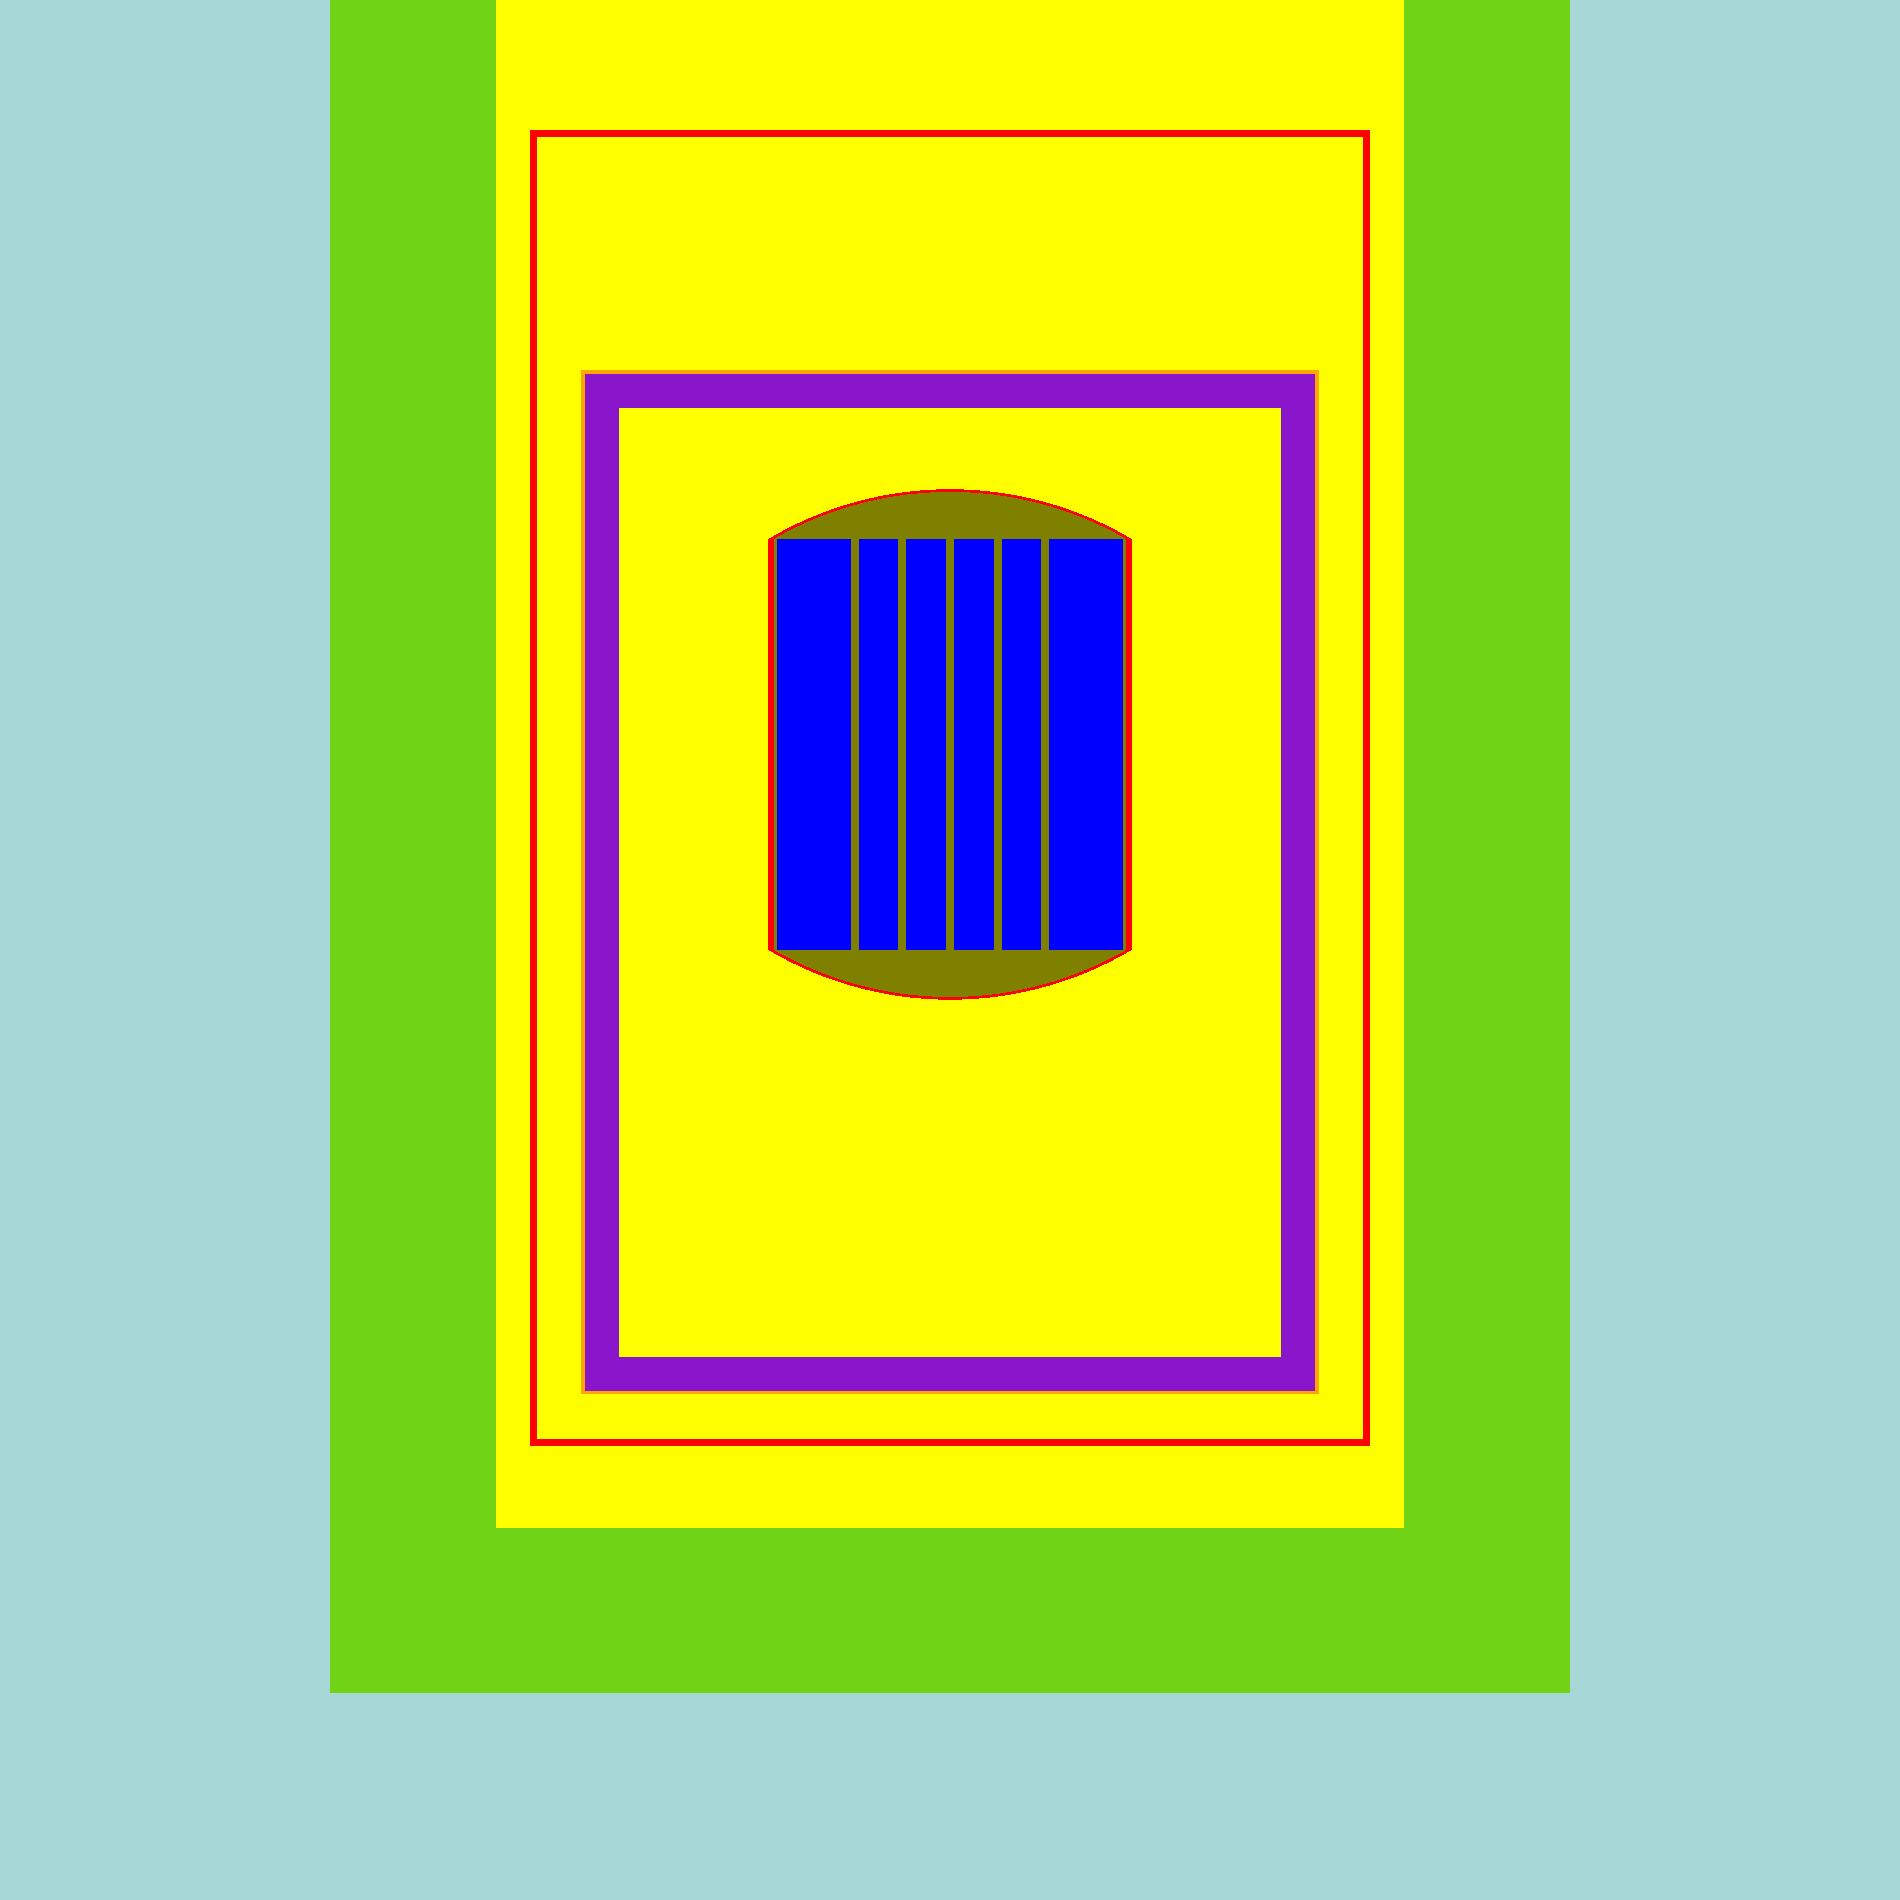

In [ ]:
plot = openmc.Plot.from_geometry(geometry)
plot.color_by = 'material'
plot.colors = colors = {
    graphite: 'blue',
    FuelSalt: 'olive',
    air: 'yellow',
    SS316H: 'red',
    b4c: 'orange',
    SiC: 'black'
}
plot.pixels = 1900,1900
plot.origin = 0,0,0
plot.basis = 'xz'
plot.to_ipython_image()

In [ ]:
# OpenMC simulation parameters, area fluxes/keno sim

#point = openmc.stats.Point((0, 0, 75))
#src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
#settings.source = src
settings.run_mode = 'eigenvalue'
settings.batches = 100
settings.inactive = 30
settings.particles = 100000
settings.export_to_xml()

import numpy as np
number_bins = 15001
bins_both = np.linspace(0, 15e6, number_bins)

tallies=openmc.Tallies()
mesh = openmc.RegularMesh()
mesh.lower_left=[-350.52,-350.52,-396]
mesh.upper_right=[350.52,350.52,515.46]
mesh.dimension=(100, 100, 100)


#Create mesh filter for tally
mesh_filter = openmc.MeshFilter(mesh)
#material_filter = openmc.MaterialFilter(FuelSalt)
energy_filter = openmc.EnergyFilter([0, 0.0625, 1.0e6, 20e6])
#Create mesh tally to score flux and fission rate
cell_filter = openmc.CellFilter([detector_cell])
tally = openmc.Tally(name='flux')
tally.filters = [mesh_filter]
tally.scores = ['flux']
tallies.append(tally)

# tally1=openmc.Tally(name='total')
# energy_filter = openmc.EnergyFilter(bins_both)
# cell_filter = openmc.CellFilter([reactor_cell, annulus_cell, vessel_cell, top_fuel_hemisphere_cell, top_vessel_hemisphere_cell, bot_fuel_hemisphere_cell, bot_vessel_hemisphere_cell,
#                                  air1_cell, poly_cell, BC_cell, air2_cell, borated_concrete_cell, structural_concrete_cell], filter_id=2)
# tally1.filters = [cell_filter, energy_filter]
# tally1.scores = ['total']
# tallies_file.append(tally1)

#Export to "tallies.xml"
tallies.export_to_xml()

In [ ]:
#Detector tallies
# OpenMC simulation parameters

point = openmc.stats.Point((0, 0, 75))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
#settings.run_mode = 'eigenvalue'
settings.batches = 111
settings.inactive = 30
settings.particles = 100000
settings.photon_transport = True
#settings.weight_windows=openmc.wwinp_to_wws("/content/MSR.wwinp")
settings.export_to_xml()


tallies=openmc.Tallies()

# mesh = openmc.RegularMesh()
# mesh.lower_left=[69,-.2481,74.7519]
# mesh.upper_right=[69.0015,.2481, 75.2481]
# mesh.dimension=(50, 50, 50)
# mesh_filter = openmc.MeshFilter(mesh)

import numpy as np
number_bins = 1000
bins_both = np.logspace(np.log10(1e-4), np.log10(15e6), number_bins, base=10)
number_bins2 = 15001
bins_both2 = np.linspace(0, 15e6, number_bins2)

energy_filter = openmc.EnergyFilter([0, 0.0625, 1.0e6, 1.9e6, 2.1e6, 20e6])
energy_filter2 = openmc.EnergyFilter(bins_both)
energy_filter3 = openmc.EnergyFilter(bins_both2)

# nparticle_filter = openmc.ParticleFilter("1")
# pparticle_filter = openmc.ParticleFilter("2")

#Create mesh tally to score flux and fission rate
cell_filter1 = openmc.CellFilter([SiC_cell])
cell_filter2 = openmc.CellFilter([detector_cell])
cell_filter3 = openmc.CellFilter([Lithium_cell])

tally = openmc.Tally(name='total')
tally.filters = [cell_filter1]
tally.scores = ['total']
tallies.append(tally)

tally5 = openmc.Tally(name='abs')
tally5.filters = [cell_filter1, energy_filter]
tally5.scores = ['absorption']
tallies.append(tally5)

tally6 = openmc.Tally(name='np')
tally6.filters = [cell_filter1]
tally6.scores = ['(n,p)']
tallies.append(tally6)

tally2 = openmc.Tally(name='noise')
tally2.filters = [cell_filter1, energy_filter3]
tally2.scores = ['heating']
tallies.append(tally2)

tally3 = openmc.Tally(name='nt')
tally3.filters = [cell_filter3, energy_filter2]
tally3.scores = ['(n,t)']
tallies.append(tally3)

tally4 = openmc.Tally(name='nalpha')
tally4.filters = [cell_filter3, energy_filter2]
tally4.scores = ['(n,a)']
tallies.append(tally4)

tally7 = openmc.Tally(name='absli')
tally7.filters = [cell_filter3, energy_filter2]
tally7.scores = ['absorption']
tallies.append(tally7)

tally8 = openmc.Tally(name='H3 prod')
tally8.filters = [cell_filter3, energy_filter2]
tally8.scores = ['H3-production']
tallies.append(tally8)

tally9 = openmc.Tally(name='He4 prod')
tally9.filters = [cell_filter3, energy_filter2]
tally9.scores = ['He4-production']
tallies.append(tally9)

# tally10 = openmc.Tally(name='absmesh')
# tally10.filters = [mesh_filter, energy_filter2]
# tally10.scores = ['absorption']
# tallies.append(tally10)

tally11 = openmc.Tally(name='heating')
tally11.filters = [cell_filter2]
tally11.scores = ['heating']
tallies.append(tally11)

tally12 = openmc.Tally(name='MT')
tally12.filters = [cell_filter1]
tally12.scores = ['501']
tallies.append(tally12)

# tally13 = openmc.Tally(name='nflux')
# tally13.filters = [cell_filter1, nparticle_filter]
# tally13.scores = ['flux']
# tallies.append(tally13)

# tally14 = openmc.Tally(name='pflux')
# tally14.filters = [cell_filter1, pparticle_filter]
# tally14.scores = ['flux']
# tallies.append(tally14)

#Export to "tallies.xml"
tallies.export_to_xml()

TypeError: ignored

In [ ]:
#depletion sim
#have to upload the custom chain before use
import openmc.deplete

openmc.config['cross_sections'] = "/content/mcnp_endfb71/cross_sections.xml"

point = openmc.stats.Point((0, 0, 75))
source = openmc.Source(space=point)
settings=openmc.Settings()
settings.temperature = {"method": "interpolation"}
settings.source=source
settings.batches=50
settings.inactive=25
settings.particles=20000
settings.export_to_xml()

# tallies=openmc.Tallies()
# mesh = openmc.RegularMesh()
# mesh.lower_left=[-100,-100,-100]
# mesh.upper_right=[100,100,200]
# mesh.dimension=(100, 100, 100)


# Create mesh filter for tally
# mesh_filter = openmc.MeshFilter(mesh)

# power = 1.63740399173073000000 specific
timesteps = [966.67, 1015.73]
fission_q = {"U235": 202.27 * 10**6, "U238": 206.8513 * 10**6,    "Pu239":   208.0185327814 * 10**6,   "Pu240": 208.6125666605*10**6, "Pu241": 211.2377153223 * 10**6, "Pu242":  212.0721865057 * 10**6}
model = openmc.Model(geometry=geometry, settings=settings, materials=materials_file)
chain = openmc.deplete.Chain.from_xml("/content/chain_mod_q.xml", fission_q)
chain.export_to_xml("chain_mod_q.xml")

op = openmc.deplete.CoupledOperator(model, "chain_mod_q.xml", fission_yield_mode='average')

OSError: ignored

In [ ]:
openmc.deplete.CECMIntegrator(op, timesteps, power_density=3.763, timestep_units='d', solver='cram16').integrate()

[openmc.deplete] t=0.0 s, dt=77760000 s, source=359931.3437448385
[openmc.deplete] t=77760000.0 s, dt=79920000 s, source=359931.3437448385
[openmc.deplete] t=157680000.0 (final operator evaluation)


In [ ]:
from google.colab import files
files.download('/content/depletion_results.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
openmc.deplete.pool.USE_MULTIPROCESSING=False

fission_q = {"U235": 202.27 * 10**6, "U238": 206.8513 * 10**6,    "Pu239":   208.0185327814 * 10**6,   "Pu240": 208.6125666605*10**6, "Pu241": 211.2377153223 * 10**6, "Pu242":  212.0721865057 * 10**6}

# comment these next two lines out if we already made our modified chain...
chain = openmc.deplete.Chain.from_xml("/content/chain_endfb71_pwr.xml", fission_q)
chain.export_to_xml("chain_mod_q.xml")

In [ ]:
results = openmc.deplete.Results("depletion_results (8).h5")

In [ ]:
%ls

 condacolab_install.log      materials.xml   settings.xml        tallies.out
'depletion_results (3).h5'   mcnp_endfb71/   statepoint.100.h5   tallies.xml
 geometry.xml                sample_data/    summary.h5


In [ ]:
#make a materials file from depletion results
x = results.export_to_materials(2)
x.export_to_xml()

/usr/local/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=11.
  warn(msg, IDWarning)
/usr/local/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=12.
  warn(msg, IDWarning)
/usr/local/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=13.
  warn(msg, IDWarning)
/usr/local/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=14.
  warn(msg, IDWarning)
/usr/local/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=15.
  warn(msg, IDWarning)
/usr/local/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=16.
  warn(msg, IDWarning)
/usr/local/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=17.
 

[0.0000e+00 8.6400e+04 5.1840e+05 9.5040e+05 1.8144e+06 4.3200e+06
 8.6400e+06 4.3200e+07 6.9120e+07 8.6400e+07 1.3824e+08 1.7712e+08] [[1.03869059e+00 3.76492793e-04]
 [1.03699505e+00 3.53232921e-04]
 [1.03727093e+00 3.66207882e-04]
 [1.03635241e+00 3.81155719e-04]
 [1.03575500e+00 3.42605858e-04]
 [1.03573496e+00 3.83988972e-04]
 [1.03359448e+00 4.40358820e-04]
 [1.02806544e+00 3.93999080e-04]
 [1.02357746e+00 3.93668277e-04]
 [1.02169620e+00 3.73998549e-04]
 [1.01705360e+00 3.58881319e-04]
 [1.01373023e+00 4.33465833e-04]]


Text(0.5, 0, 'Time (D)')

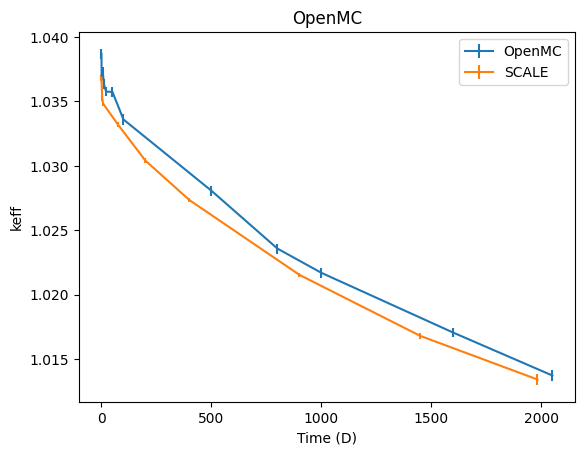

In [ ]:
import matplotlib.pyplot as plt
time, keff = results.get_keff()
print (time, keff)
time = time/86400
fig = plt.figure()
ax = fig.add_subplot()
time2=[0, 3.5, 8.5, 75, 200, 400, 900, 1450, 1982.4]
SCALEkeff = [ 1.03683, 1.0352, 1.0348, 1.0332, 1.0304, 1.02734, 1.02154, 1.0168, 1.01342]
SCALEkerr = [0.00023, 0.00019, 0.00018, 0.00020, .00017, .00016, 0.00017, .0002, 0.00042]
ax.errorbar(time, keff[:,0], yerr=keff[:,1])
ax.errorbar(time2, SCALEkeff, SCALEkerr)
ax.legend(['OpenMC', 'SCALE'])
ax.set_title('OpenMC')
ax.set_ylabel('keff')
ax.set_xlabel('Time (D)')

[3.43781993e+20 3.43324460e+20 3.42854460e+20]
[   0.  900. 1825.]


Text(0.5, 0, 'Time (D)')

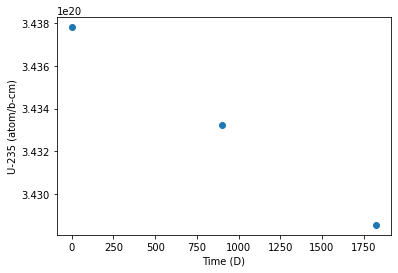

In [ ]:
import matplotlib.pyplot as plt
time, atoms = results.get_atoms('1', 'U235', 'atom/cm3', 'd')
print ((atoms))
print ((time))
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(time, atoms)
ax.set_ylabel('U-235 (atom/b-cm)')
ax.set_xlabel('Time (D)')

In [ ]:
sp.close()
%ls

condacolab_install.log  materials.xml  settings.xml       tallies.out
EnergyGroups.h5         mcnp_endfb71/  statepoint.100.h5  tallies.xml
geometry.xml            sample_data/   summary.h5


In [ ]:
#Keno style sim
openmc.run(tracks=False)

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
import openmc

In [ ]:
from google.colab import files
files.download('/content/statepoint.100.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

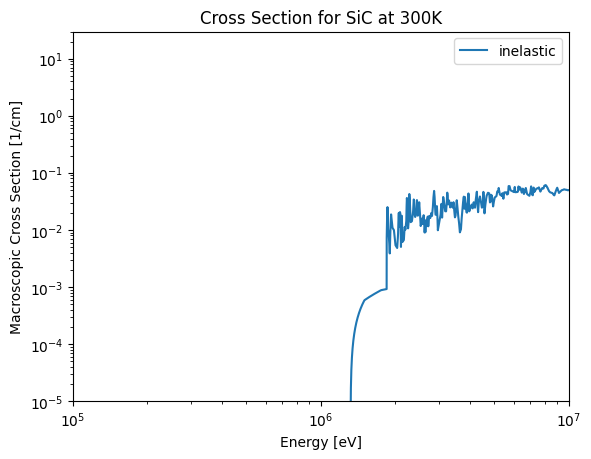

In [ ]:

import matplotlib.pyplot as plt
import openmc.data
from matplotlib.patches import Rectangle
import matplotlib.cm



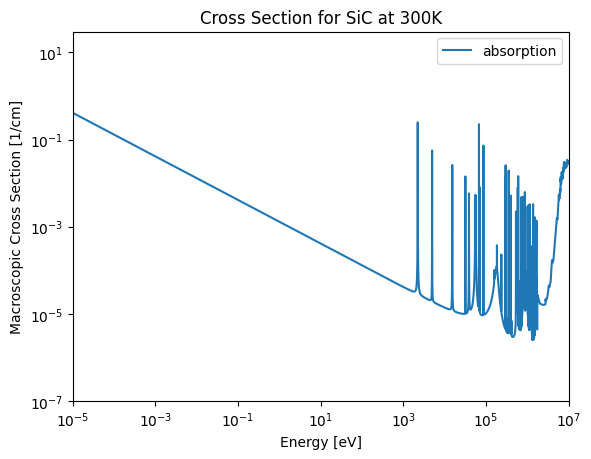

In [ ]:
import matplotlib.pyplot as plt

openmc.config['cross_sections']="/content/endfb-vii.1-hdf5/cross_sections.xml"
openmc.plot_xs(SiC,['absorption'],temperature=300)
plt.xlim([1e-5,10e6])
plt.ylim([1e-7,30])
plt.title('Cross Section for SiC at 300K')
plt.show()

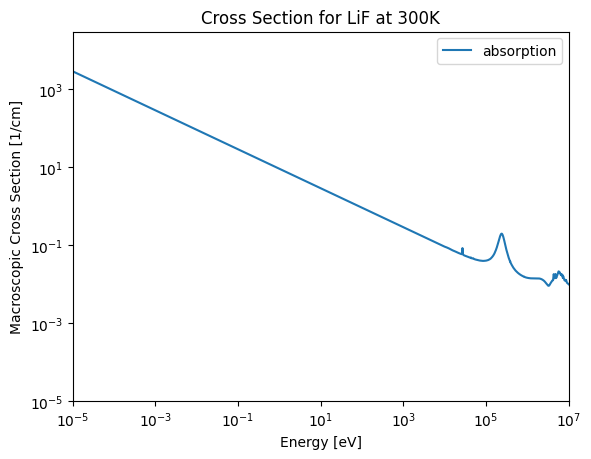

In [ ]:
openmc.config['cross_sections']="/content/endfb-vii.1-hdf5/cross_sections.xml"
openmc.plot_xs(LiF,['absorption'],temperature=300)
plt.xlim([.00001,10e6])
plt.ylim([1e-5,30000])
plt.title('Cross Section for LiF at 300K')
plt.show()

In [ ]:
sp = openmc.StatePoint('statepoint.100.h5')
tally=sp.get_tally(['flux'])

In [ ]:
# sp = openmc.StatePoint('primarysourceflux.h5')

# tally = sp.get_tally(scores=['flux'])

flux = tally.get_slice(scores=['flux'])
#fission = tally.get_slice(scores=['fission'])
# flux.std_dev.shape = (10, 20, 30)
# flux.mean.shape = (300, 20)
# fission.std_dev.shape = (10, 20, 30)
# fission.mean.shape = (10, 20, 30)
# #twodflux=flux.mean[1, :, :]
# twodfission=fission.mean[:, :, 15]

In [ ]:
sp = openmc.StatePoint('statepoint.100.h5')

total = sp.get_tally(name='total')
abs = sp.get_tally(name='abs')
np = sp.get_tally(name='np')
heating = sp.get_tally(name='heating')
nt = sp.get_tally(name='nt')
nalpha = sp.get_tally(name='nalpha')


1.0


Text(0, 0.5, 'Probability/eV')

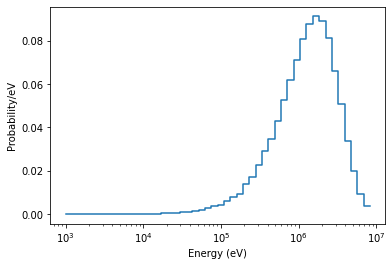

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create log-spaced energy bins from 1 keV to 10 MeV
energy_bins = np.logspace(3,7)

# Calculate pdf for source energies
probability, bin_edges = np.histogram(sp.source['E'], energy_bins, density=True)

# Make sure integrating the PDF gives us unity
print(sum(probability*np.diff(energy_bins)))

# Plot source energy PDF
plt.semilogx(energy_bins[:-1], probability*np.diff(energy_bins), drawstyle='steps')
plt.xlabel('Energy (eV)')
plt.ylabel('Probability/eV')

In [ ]:
print (np.dot(energy_bins[:-1],(probability*np.diff(energy_bins)))/1E6)

1.8363569940925615


In [ ]:
print (energy_bins[1:])

[1.20679264e+03 1.45634848e+03 1.75751062e+03 2.12095089e+03
 2.55954792e+03 3.08884360e+03 3.72759372e+03 4.49843267e+03
 5.42867544e+03 6.55128557e+03 7.90604321e+03 9.54095476e+03
 1.15139540e+04 1.38949549e+04 1.67683294e+04 2.02358965e+04
 2.44205309e+04 2.94705170e+04 3.55648031e+04 4.29193426e+04
 5.17947468e+04 6.25055193e+04 7.54312006e+04 9.10298178e+04
 1.09854114e+05 1.32571137e+05 1.59985872e+05 1.93069773e+05
 2.32995181e+05 2.81176870e+05 3.39322177e+05 4.09491506e+05
 4.94171336e+05 5.96362332e+05 7.19685673e+05 8.68511374e+05
 1.04811313e+06 1.26485522e+06 1.52641797e+06 1.84206997e+06
 2.22299648e+06 2.68269580e+06 3.23745754e+06 3.90693994e+06
 4.71486636e+06 5.68986603e+06 6.86648845e+06 8.28642773e+06
 1.00000000e+07]


In [ ]:
print (energy_bins[:-1])

[1.00000000e+03 1.20679264e+03 1.45634848e+03 1.75751062e+03
 2.12095089e+03 2.55954792e+03 3.08884360e+03 3.72759372e+03
 4.49843267e+03 5.42867544e+03 6.55128557e+03 7.90604321e+03
 9.54095476e+03 1.15139540e+04 1.38949549e+04 1.67683294e+04
 2.02358965e+04 2.44205309e+04 2.94705170e+04 3.55648031e+04
 4.29193426e+04 5.17947468e+04 6.25055193e+04 7.54312006e+04
 9.10298178e+04 1.09854114e+05 1.32571137e+05 1.59985872e+05
 1.93069773e+05 2.32995181e+05 2.81176870e+05 3.39322177e+05
 4.09491506e+05 4.94171336e+05 5.96362332e+05 7.19685673e+05
 8.68511374e+05 1.04811313e+06 1.26485522e+06 1.52641797e+06
 1.84206997e+06 2.22299648e+06 2.68269580e+06 3.23745754e+06
 3.90693994e+06 4.71486636e+06 5.68986603e+06 6.86648845e+06
 8.28642773e+06]


In [ ]:
#for voxelplots
! pip install vtk
import vtk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 MB 8.8 MB/s eta 0:00:00


In [ ]:
mesh = openmc.RegularMesh()
mesh.lower_left=[-350.52,-350.52,-396]
mesh.upper_right=[350.52,350.52,515.46]
mesh.dimension=(100, 100, 100)
mesh.write_data_to_vtk(
    filename="tally_on_mesh.vtk",
    datasets={"mean": flux.mean}  # the first "mean" is the name of the data set label inside the vtk file
)

<vtkmodules.vtkCommonDataModel.vtkStructuredGrid(0x461c030) at 0x7ff5857a7160>

In [ ]:
from google.colab import files
files.download('/content/tally_on_mesh.vtk')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

tracks = openmc.Tracks('tracks.h5')
tracks.write_to_vtk('tracks.h5')

OSError: ignored

In [ ]:
%ls

condacolab_install.log  mcnp_endfb71/  statepoint.100.h5  tallies.xml
geometry.xml            sample_data/   summary.h5         tally_on_mesh.vtk
materials.xml           settings.xml   tallies.out


In [ ]:
!openmc-voxel-to-vtk /content/voxelplot.h5

Reading and translating data...
Writing VTK file plot.vti...


In [ ]:
#tally data
total.get_pandas_dataframe()


,cell,nuclide,score,mean,std. dev.
0,13,total,total,3.020785e-08,1.322514e-08


In [ ]:
abs.get_pandas_dataframe()

,cell,energy low [eV],energy high [eV],nuclide,score,mean,std. dev.
0,13,0.000000e+00,6.250000e-02,total,absorption,2.629196e-11,2.110179e-11
1,13,6.250000e-02,1.000000e+06,total,absorption,4.002208e-09,3.731406e-09
2,13,1.000000e+06,1.900000e+06,total,absorption,4.237428e-12,2.665238e-12
3,13,1.900000e+06,2.100000e+06,total,absorption,0.000000e+00,0.000000e+00
4,13,2.100000e+06,2.000000e+07,total,absorption,4.505601e-11,2.953136e-11


In [ ]:
nt.get_pandas_dataframe()

,cell,nuclide,score,mean,std. dev.
0,11,total,"(n,t)",2.300048e-07,1.321535e-07


In [ ]:
np.get_pandas_dataframe()

,cell,nuclide,score,mean,std. dev.
0,13,total,"(n,p)",0.0,0.0


In [ ]:
nalpha.get_pandas_dataframe()

,cell,nuclide,score,mean,std. dev.
0,11,total,"(n,a)",0.0,0.0


In [ ]:
heating.get_pandas_dataframe()

,cell,nuclide,score,mean,std. dev.
0,42,total,heating,0.696541,0.488962


In [ ]:
tally1.get_pandas_dataframe()

,cell,nuclide,score,mean,std. dev.
0,22,total,total,1.052689e-08,3.083937e-09


In [ ]:
tally2.get_pandas_dataframe()

,cell,nuclide,score,mean,std. dev.
0,50,total,heating,0.00021,0.000143


In [ ]:
print (df)

       mesh 2       energy low [eV] energy high [eV] nuclide score mean  \
            x  y  z                                                       
151501      1  6  6          0.0625        1000000.0   total  flux  0.0   
151504      2  6  6          0.0625        1000000.0   total  flux  0.0   
151507      3  6  6          0.0625        1000000.0   total  flux  0.0   
151510      4  6  6          0.0625        1000000.0   total  flux  0.0   
151513      5  6  6          0.0625        1000000.0   total  flux  0.0   
151516      6  6  6          0.0625        1000000.0   total  flux  0.0   
151519      7  6  6          0.0625        1000000.0   total  flux  0.0   
151522      8  6  6          0.0625        1000000.0   total  flux  0.0   
151525      9  6  6          0.0625        1000000.0   total  flux  0.0   
151528     10  6  6          0.0625        1000000.0   total  flux  0.0   
151531     11  6  6          0.0625        1000000.0   total  flux  0.0   
151534     12  6  6      

In [ ]:
print(df)

        mesh 2         energy low [eV] energy high [eV] nuclide score  \
             x   y   z                                                  
1544851     51  50  52          0.0625        1000000.0   total  flux   
1544854     52  50  52          0.0625        1000000.0   total  flux   
1544857     53  50  52          0.0625        1000000.0   total  flux   
1544860     54  50  52          0.0625        1000000.0   total  flux   
1544863     55  50  52          0.0625        1000000.0   total  flux   
1544866     56  50  52          0.0625        1000000.0   total  flux   
1544869     57  50  52          0.0625        1000000.0   total  flux   
1544872     58  50  52          0.0625        1000000.0   total  flux   
1544875     59  50  52          0.0625        1000000.0   total  flux   
1544878     60  50  52          0.0625        1000000.0   total  flux   
1544881     61  50  52          0.0625        1000000.0   total  flux   
1544884     62  50  52          0.0625        10000

In [ ]:
df = flux.get_pandas_dataframe()
#df=df[df['']]
print(df)

       mesh 1           nuclide score     mean std. dev.
            x    y    z                                 
0           1    1    1   total  flux 0.00e+00  0.00e+00
1           2    1    1   total  flux 0.00e+00  0.00e+00
2           3    1    1   total  flux 0.00e+00  0.00e+00
3           4    1    1   total  flux 0.00e+00  0.00e+00
4           5    1    1   total  flux 0.00e+00  0.00e+00
...       ...  ...  ...     ...   ...      ...       ...
999995     96  100  100   total  flux 0.00e+00  0.00e+00
999996     97  100  100   total  flux 0.00e+00  0.00e+00
999997     98  100  100   total  flux 0.00e+00  0.00e+00
999998     99  100  100   total  flux 0.00e+00  0.00e+00
999999    100  100  100   total  flux 0.00e+00  0.00e+00

[1000000 rows x 7 columns]


In [ ]:
#centerline fluxes normalized
df = flux.get_pandas_dataframe()
df.drop(df.index[515000:1000000], inplace=True)
df.drop(df.index[0:514960], inplace=True)
df.loc[:,'mean'] *= 7.36E16/447.94
print(df)

       mesh 1         nuclide score     mean std. dev.
            x   y   z                                 
514960     61  50  52   total  flux 8.49e+11  7.30e-05
514961     62  50  52   total  flux 7.82e+11  6.33e-05
514962     63  50  52   total  flux 7.33e+11  6.88e-05
514963     64  50  52   total  flux 7.00e+11  7.41e-05
514964     65  50  52   total  flux 6.82e+11  6.62e-05
514965     66  50  52   total  flux 6.51e+11  5.61e-05
514966     67  50  52   total  flux 6.43e+11  5.57e-05
514967     68  50  52   total  flux 6.00e+11  8.00e-05
514968     69  50  52   total  flux 2.05e+11  7.92e-05
514969     70  50  52   total  flux 1.53e+10  1.20e-05
514970     71  50  52   total  flux 7.10e+09  6.10e-06
514971     72  50  52   total  flux 3.60e+09  3.79e-06
514972     73  50  52   total  flux 4.00e+09  4.71e-06
514973     74  50  52   total  flux 3.97e+09  4.73e-06
514974     75  50  52   total  flux 5.10e+09  8.92e-06
514975     76  50  52   total  flux 1.34e+09  3.23e-06
514976    

In [ ]:
import math
df = flux.get_pandas_dataframe()
df.drop(df.index[515000:1000000], inplace=True)
df.drop(df.index[0:514960], inplace=True)
df.loc[:,'mean'] *= 7.36E16/447.94
for index, value in df['mean'].items():
  if value >0:
    df.loc[index, 'mean'] = math.log((5.39E9 / value), 0.5) * 1.575
for index, value in df['mean'].items():
  if value < 0:
    df.loc[index, 'mean'] = 0
print(df)

       mesh 1         nuclide score     mean std. dev.
            x   y   z                                 
514960     61  50  52   total  flux 1.15e+01  7.30e-05
514961     62  50  52   total  flux 1.13e+01  6.33e-05
514962     63  50  52   total  flux 1.12e+01  6.88e-05
514963     64  50  52   total  flux 1.11e+01  7.41e-05
514964     65  50  52   total  flux 1.10e+01  6.62e-05
514965     66  50  52   total  flux 1.09e+01  5.61e-05
514966     67  50  52   total  flux 1.09e+01  5.57e-05
514967     68  50  52   total  flux 1.07e+01  8.00e-05
514968     69  50  52   total  flux 8.26e+00  7.92e-05
514969     70  50  52   total  flux 2.37e+00  1.20e-05
514970     71  50  52   total  flux 6.25e-01  6.10e-06
514971     72  50  52   total  flux 0.00e+00  3.79e-06
514972     73  50  52   total  flux 0.00e+00  4.71e-06
514973     74  50  52   total  flux 0.00e+00  4.73e-06
514974     75  50  52   total  flux 0.00e+00  8.92e-06
514975     76  50  52   total  flux 0.00e+00  3.23e-06
514976    

<ipython-input-59-ee133888d9a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance']=distance


<Axes: xlabel='distance', ylabel='mean'>

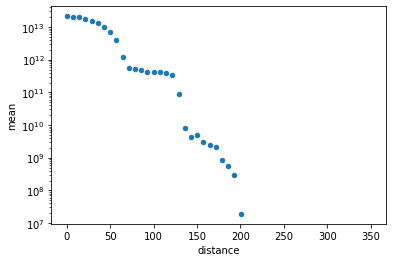

In [ ]:
import numpy as np
distance = np.linspace (0, 350.52, 50)
df['distance']=distance
df.plot(x ='distance', y='mean', kind = 'scatter', logy=True)
#Epithermal

<ipython-input-61-ee133888d9a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance']=distance


<Axes: xlabel='distance', ylabel='mean'>

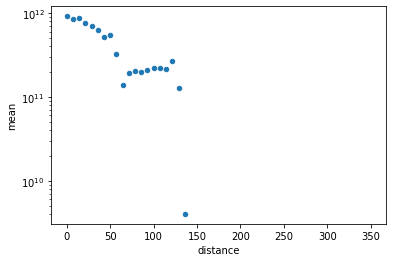

In [ ]:
import numpy as np
distance = np.linspace (0, 350.52, 50)
df['distance']=distance
df.plot(x ='distance', y='mean', kind = 'scatter', logy=True)
#Thermal

<ipython-input-63-ee133888d9a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance']=distance


<Axes: xlabel='distance', ylabel='mean'>

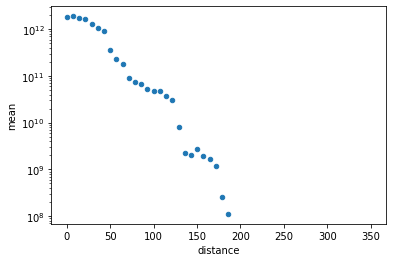

In [ ]:
import numpy as np
distance = np.linspace (0, 350.52, 50)
df['distance']=distance
df.plot(x ='distance', y='mean', kind = 'scatter', logy=True)
#Fast